## **Today I'm saling cars**

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv('cars.csv')
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [143]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [145]:
# that's okay
print(df['Brand'].nunique())
print(df['Owner_Type'].nunique())
# that's not okay
print(df['Model'].nunique())

11
3
58


In [146]:
df = df.drop('Model', axis=1)
df.shape

(100, 12)

**I will transform price from INR to USD as it's more convenient**
Course of 09.06.2024

In [147]:
df['Price'] = df['Price'] * 0.012

## **What Factors are Useful**
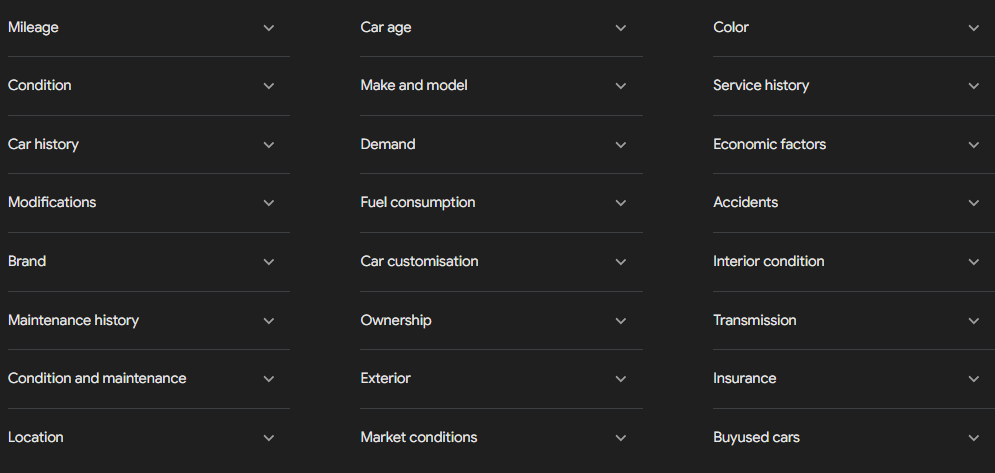

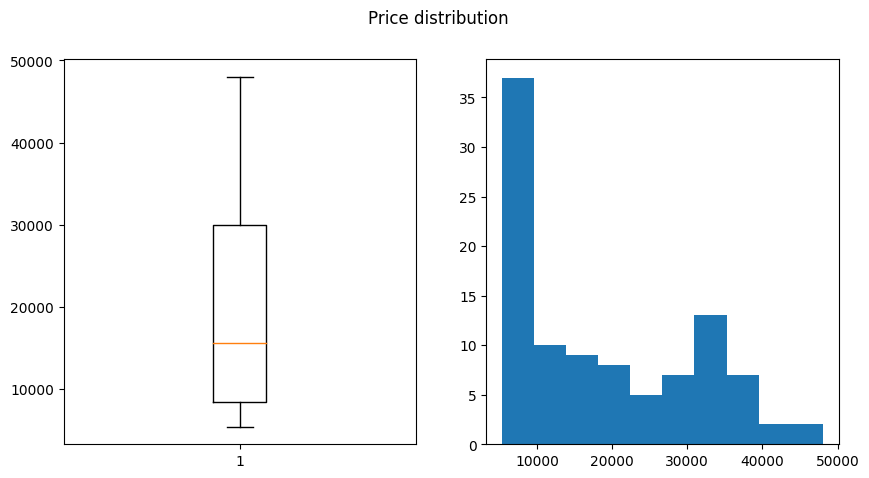

In [148]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

fig.suptitle('Price distribution')

ax1.boxplot(df['Price']);
ax2.hist(df['Price']);

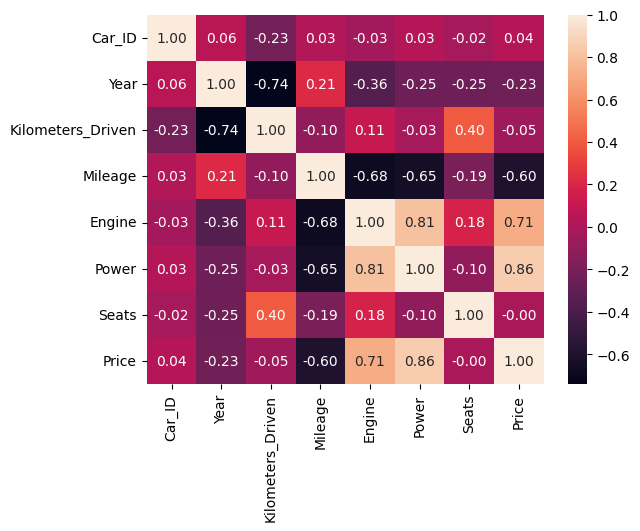

In [149]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f');

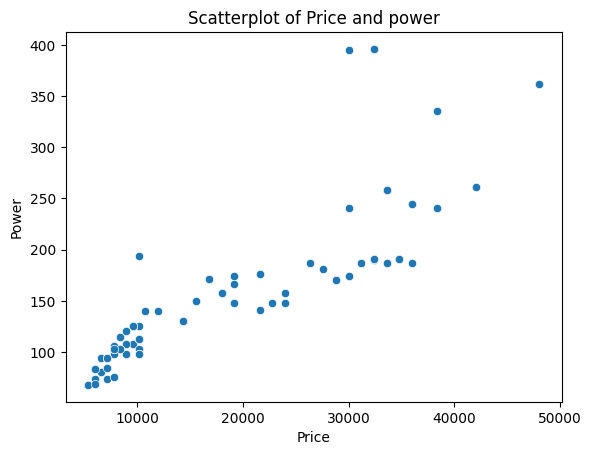

In [150]:
plt.title('Scatterplot of Price and power')
sns.scatterplot(x='Price', y='Power', data=df);

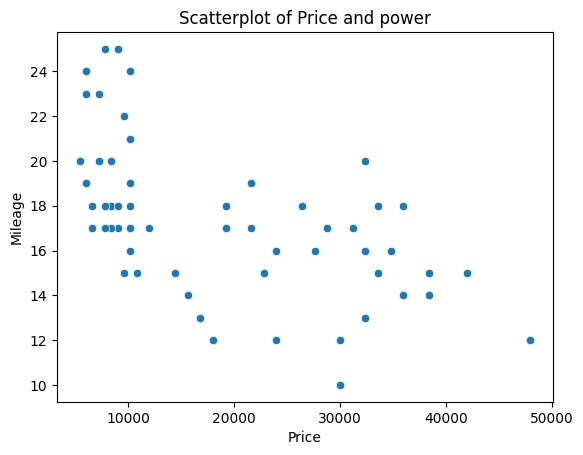

In [151]:
plt.title('Scatterplot of Price and power')
sns.scatterplot(x='Price', y='Mileage', data=df);

well...

In [152]:
df = df.drop('Car_ID', axis=1)

# **Data Scaling and preprocessing**

In [153]:
df.head(1)

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,2018,50000,Petrol,Manual,First,15,1498,108,5,9600.0


In [154]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [155]:
num = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Year']
cat = ['Brand', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [156]:
scaler = StandardScaler()
numeric_transformed = scaler.fit_transform(df[num])

In [157]:
numeric_transformed_df = pd.DataFrame(numeric_transformed, columns=num)
numeric_transformed_df.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Year
0,2.407540,-0.671057,-0.568704,-0.654590,-0.308149,-0.334681
1,1.305691,-0.063766,-0.411098,-0.236739,-0.308149,0.523475
2,-0.898007,-2.189286,4.928417,3.093011,-1.647929,-1.192836
3,0.203842,1.758109,-0.966700,-1.098556,-0.308149,1.381631
4,3.509389,0.239880,0.228880,0.468385,-0.308149,-2.050992


In [158]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
cat_transformed = ohe.fit_transform(df[cat])

In [159]:
cat_transformed

,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [160]:
X = pd.merge(numeric_transformed_df, cat_transformed, left_index=True,
             right_index=True)

In [161]:
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Year,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,...,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third
0,2.407540,-0.671057,-0.568704,-0.654590,-0.308149,-0.334681,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,1.305691,-0.063766,-0.411098,-0.236739,-0.308149,0.523475,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,-0.898007,-2.189286,4.928417,3.093011,-1.647929,-1.192836,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.203842,1.758109,-0.966700,-1.098556,-0.308149,1.381631,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3.509389,0.239880,0.228880,0.468385,-0.308149,-2.050992,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [162]:
y = df['Price']

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## **Let's start with simple things**

In [165]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error

In [166]:
linear_model = Ridge(alpha=0.1)
linear_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [167]:
y_train_pred = cross_val_predict(linear_model, X_train, y_train, cv=3)
y_train_pred[:10]

array([10874.87250633, 22309.427671  ,  8611.58147388, 31708.32712263,
        7746.25973404,  9187.42554594,  6402.77583887, 30218.97462118,
        5601.71982989,  9159.69420606])

In [168]:
mean_squared_error(y_train, y_train_pred)

10639945.596477374

In [169]:
from sklearn.model_selection import learning_curve

In [170]:
train_size, train_scores, valid_scores = learning_curve(
    linear_model, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errs = -train_scores.mean(axis=1)
val_errs = -valid_scores.mean(axis=1)

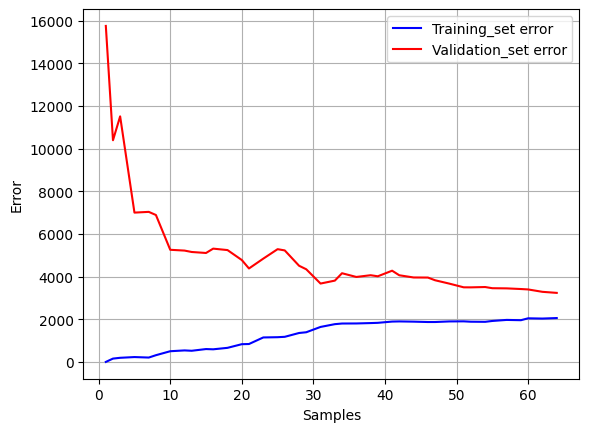

In [171]:
plt.plot(train_size, train_errs, color='blue', label='Training_set error')
plt.plot(train_size, val_errs, color='red', label='Validation_set error')
plt.grid()
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Error')
plt.show();

Oh uh...

In [172]:
from sklearn.svm import SVR

In [173]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [174]:
y_train_pred = cross_val_predict(svr, X_train, y_train, cv=3)
y_train_pred[:10]

array([16796.14320284, 16798.95061491, 16792.24200333, 16802.82394745,
       16795.22033551, 16794.16118801, 16788.95454977, 16800.48705765,
       16793.01448618, 16792.76574869])

In [175]:
mean_squared_error(y_train, y_train_pred)

163745168.6333292

In [176]:
import sklearn

In [177]:
train_size, train_scores, valid_scores = learning_curve(
    svr, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errs = -train_scores.mean(axis=1)
val_errs = -valid_scores.mean(axis=1)

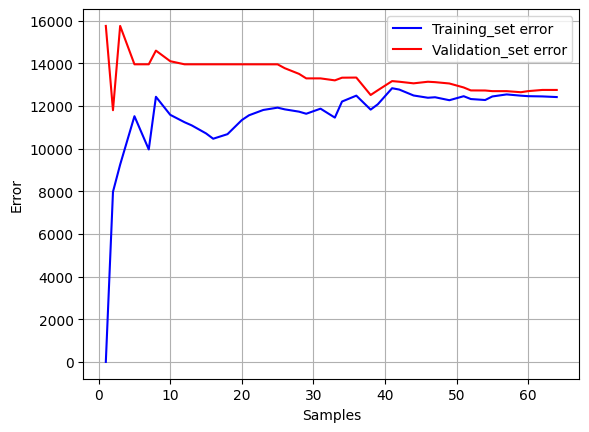

In [178]:
plt.plot(train_size, train_errs, color='blue', label='Training_set error')
plt.plot(train_size, val_errs, color='red', label='Validation_set error')
plt.grid()
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Error')
plt.show();

In [179]:
test_pred = svr.predict(X_test)

In [180]:
y_test = np.array(y_test)

In [181]:
for i in range(len(test_pred)):
  print(f'{y_test[i]} \  {test_pred[i]}')

8400.0 \  14990.79514362945
7800.0 \  14990.99380713321
21600.0 \  15003.076549327327
33600.0 \  15002.742506710672
38400.0 \  15006.322119055536
32400.0 \  15007.160816579019
38400.0 \  15006.322119055536
16800.0 \  15004.031234569968
6000.0 \  14988.985472797453
8400.0 \  14992.111074636034
21600.0 \  15003.144248992714
19200.0 \  14995.523961968356
10200.0 \  14995.184571544054
42000.0 \  15008.08208196753
7200.0 \  14988.407558045234
10200.0 \  14996.367500851093
5400.0 \  14986.518316005808
30000.0 \  15000.276296250991
31200.0 \  15005.577015329738
6000.0 \  14990.983542792215


In [182]:
from sklearn.neighbors import KNeighborsRegressor

In [183]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [184]:
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
y_train_pred[:10]

array([12360., 20520.,  7200., 29280.,  9600., 13200.,  7440., 32160.,
        9960.,  8160.])

In [185]:
mean_squared_error(y_train, y_train_pred)

22172580.0

In [186]:
import sklearn

In [ ]:
train_size, train_scores, valid_scores = learning_curve(
    knn, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errs = -train_scores.mean(axis=1)
val_errs = -valid_scores.mean(axis=1)

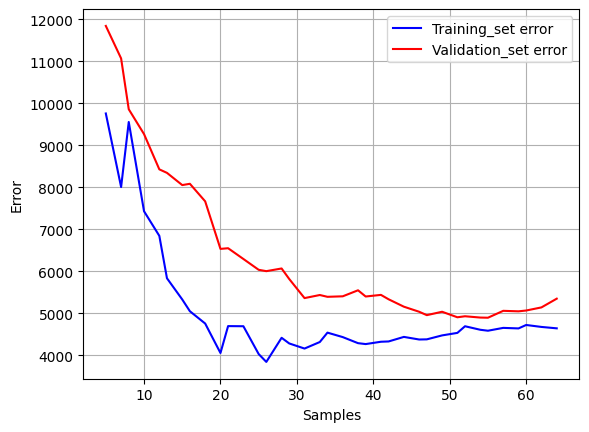

In [188]:
# seems something fucked up
plt.plot(train_size, train_errs, color='blue', label='Training_set error')
plt.plot(train_size, val_errs, color='red', label='Validation_set error')
plt.grid()
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Error')
plt.show();

In [192]:
test_pred = knn.predict(X_test)

In [193]:
y_test = np.array(y_test)

In [194]:
for i in range(len(test_pred)):
  print(f'{y_test[i]} \  {test_pred[i]}')

8400.0 \  9120.0
7800.0 \  7800.0
21600.0 \  23040.0
33600.0 \  30480.0
38400.0 \  29520.0
32400.0 \  29280.0
38400.0 \  29520.0
16800.0 \  18960.0
6000.0 \  7080.0
8400.0 \  18600.0
21600.0 \  21360.0
19200.0 \  11280.0
10200.0 \  8160.0
42000.0 \  34080.0
7200.0 \  6960.0
10200.0 \  11880.0
5400.0 \  6600.0
30000.0 \  41040.0
31200.0 \  30960.0
6000.0 \  7440.0


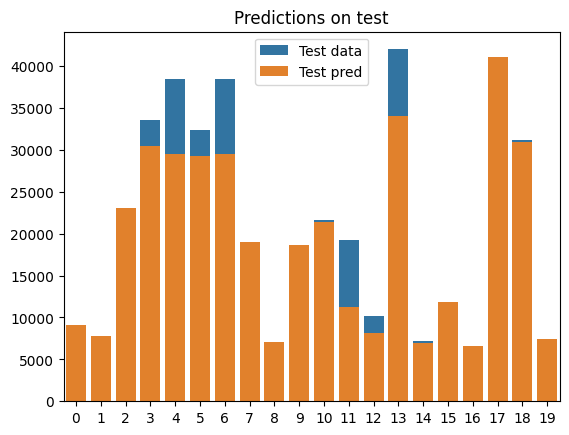

In [204]:
plt.title('Predictions on test')
sns.barplot(x=range(20), y=y_test, label='Test data');
sns.barplot(x=range(20), y=test_pred, label='Test pred');
plt.legend()
plt.show();

# **Nailed It!**

**Me when I finished another shitty project**<br>
<img src='https://media1.tenor.com/m/J92qz0N7MNoAAAAd/walter-white-ballin-walter-white.gif' width=25%>